In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear
import scipy.io
%matplotlib inline

In [4]:
x_data = scipy.io.loadmat('test_tito_X.mat')
y_data = scipy.io.loadmat('test_tito_y.mat')

In [5]:
x_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Sep 14 10:35:27 2021',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[  12. , 3504. ,  307. ,  130. ],
        [  11.5, 3693. ,  350. ,  165. ],
        [  11. , 3436. ,  318. ,  150. ],
        ...,
        [  11.6, 2295. ,  135. ,   84. ],
        [  18.6, 2625. ,  120. ,   79. ],
        [  19.4, 2720. ,  119. ,   82. ]])}

In [3]:
x_data = pd.DataFrame(x_data['X'], columns = 'F1 F2 F3 F4'.split())

In [4]:
y_data = pd.DataFrame(y_data['y'],columns = 'O'.split())

In [5]:
x_data.head()

,F1,F2,F3,F4
0,12.0,3504.0,307.0,130.0
1,11.5,3693.0,350.0,165.0
2,11.0,3436.0,318.0,150.0
3,12.0,3433.0,304.0,150.0
4,10.5,3449.0,302.0,140.0


In [6]:
y_data.head()

,O
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [7]:
df = pd.concat([x_data,y_data],axis = 1 )

In [8]:
df.head()

,F1,F2,F3,F4,O
0,12.0,3504.0,307.0,130.0,18.0
1,11.5,3693.0,350.0,165.0,15.0
2,11.0,3436.0,318.0,150.0,18.0
3,12.0,3433.0,304.0,150.0,16.0
4,10.5,3449.0,302.0,140.0,17.0


In [9]:
df.isnull().sum()

F1    0
F2    0
F3    0
F4    6
O     8
dtype: int64

In [10]:
df = df.dropna(axis=0,how='any')

In [11]:
df.isnull().sum()

F1    0
F2    0
F3    0
F4    0
O     0
dtype: int64

In [12]:
x_train = df.drop('O',axis = 1)

In [13]:
y_train = df.drop(['F1', 'F2', 'F3', 'F4'], axis = 1)

In [14]:
numpy_array_x = x_train.to_numpy()
numpy_array_y = y_train.to_numpy()

In [15]:
scipy.io.savemat('test_andre_2.mat', dict(x=numpy_array_x, y=numpy_array_y))

In [16]:
alpha_vector = np.arange(0.001,1000,0.1) #ou Lambda
num_iteracoes = 10000
aux = 0 # usado no ciclo de treino para vários lambdas
espaco = 0 # usado no ciclo de treino para vários lambdas

## Lasso Regression

In [17]:
Matriz_Lasso_Coef = np.ones((alpha_vector.size,4), dtype = float)
Matriz_Lasso_Classic_Coef = np.ones((alpha_vector.size,4), dtype = float)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train,test_size=0.25,random_state=101)

In [19]:
aux = 0
espaco = 0
for aux in alpha_vector:
    Lasso_Model_alpha = linear.Lasso(alpha = aux, max_iter=10000)
    Lasso_Model_alpha.fit(X_train,Y_train)
    Matriz_Lasso_Coef[espaco,:] = Lasso_Model_alpha.coef_
    espaco = espaco + 1

Text(0, 0.5, 'Coeficientes de Lasso')

<Figure size 432x288 with 0 Axes>

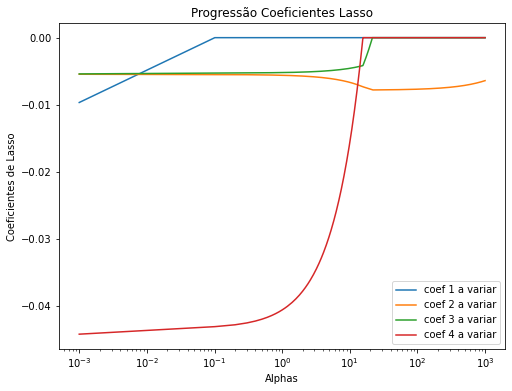

In [20]:
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(alpha_vector, Matriz_Lasso_Coef[:,0], label = 'coef 1 a variar')
plt.plot(alpha_vector, Matriz_Lasso_Coef[:,1], label = 'coef 2 a variar')
plt.plot(alpha_vector, Matriz_Lasso_Coef[:,2], label = 'coef 3 a variar')
plt.plot(alpha_vector, Matriz_Lasso_Coef[:,3], label = 'coef 4 a variar')

plt.xscale('log')
plt.legend()
plt.title('Progressão Coeficientes Lasso')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Lasso')

In [21]:
alpha_critico = 0.1

In [22]:
Lasso_Modelo = linear.Lasso(alpha = alpha_critico, max_iter= num_iteracoes)
Lasso_Modelo.fit(X_train, Y_train)

Lasso(alpha=0.1, max_iter=10000)

In [23]:
predictions = Lasso_Modelo.predict(X_test)

Text(0, 0.5, 'Coeficientes de Lasso')

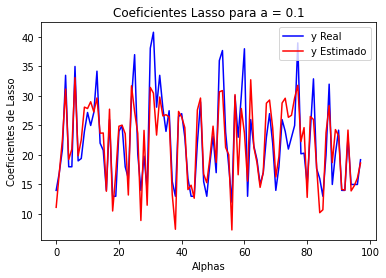

In [24]:
plt.figure()
plt.plot(range(0,98),Y_test['O'],'b', label = 'y Real')
plt.plot(range(0,98),predictions, 'r', label = 'y Estimado')

plt.legend()
plt.title('Coeficientes Lasso para a = 0.1')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Lasso')

In [25]:
erro = (predictions-Y_test['O'])**2

In [26]:
print(erro.mean())

14.538271084332111


In [27]:
Y_test.describe()

,O
count,98.000000
mean,22.165306
std,7.263723
min,12.000000
25%,16.000000
50%,21.000000
75%,26.375000
max,40.800000


## Ridge Regression

In [28]:
alpha_vector = np.arange(0.001,100000000,1000000) #ou Lambda
num_iteracoes = 10000
aux = 0 # usado no ciclo de treino para vários lambdas
espaco = 0 # usado no ciclo de treino para vários lambdas
Matriz_Ridge_Coef = np.ones((alpha_vector.size,4), dtype = float)
Matriz_Ridge_Classic_Coef = np.ones((alpha_vector.size,4), dtype = float)

In [29]:
for aux in alpha_vector:
    Ridge_Model_alpha = linear.Ridge(alpha = aux, max_iter=10000)
    Ridge_Model_alpha.fit(X_train,Y_train)
    Matriz_Ridge_Coef[espaco,:] = Ridge_Model_alpha.coef_
    espaco = espaco + 1 
    #linhas -> para cada alfa
    #colunas -> coeficientes

Text(0, 0.5, 'Coeficientes de Ridge')

<Figure size 432x288 with 0 Axes>

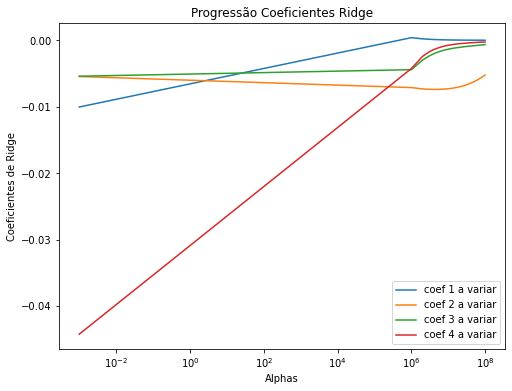

In [30]:
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(alpha_vector, Matriz_Ridge_Coef[:,0], label = 'coef 1 a variar')
plt.plot(alpha_vector, Matriz_Ridge_Coef[:,1], label = 'coef 2 a variar')
plt.plot(alpha_vector, Matriz_Ridge_Coef[:,2], label = 'coef 3 a variar')
plt.plot(alpha_vector, Matriz_Ridge_Coef[:,3], label = 'coef 4 a variar')

plt.xscale('log')
plt.legend()
plt.title('Progressão Coeficientes Ridge')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Ridge')


In [73]:
alpha_critico = 0.2

In [74]:
Ridge_Modelo = linear.Ridge(alpha = alpha_critico, max_iter= num_iteracoes)
Ridge_Modelo.fit(X_train, Y_train)

Ridge(alpha=0.2, max_iter=10000)

In [75]:
predictions = Ridge_Modelo.predict(X_test)

Text(0, 0.5, 'Coeficientes de Ridge')

<Figure size 432x288 with 0 Axes>

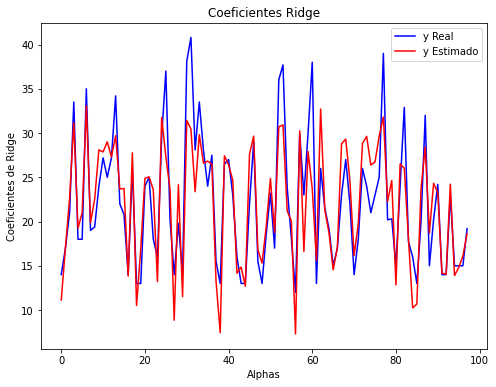

In [76]:
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(range(0,98),Y_test['O'],'b', label = 'y Real')
plt.plot(range(0,98),predictions, 'r', label = 'y Estimado')

plt.legend()
plt.title('Coeficientes Ridge')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes de Ridge')

In [77]:
erro = (predictions-Y_test)**2
print(erro.mean())

O    14.535719
dtype: float64
